# Trabalho 4 de IA - Aprendizado Não Supervisionado
## Alunas:
### Nicole Ramos 
### Carolina Santos 

## Links para baixar o dataset:
[Seeds Dataset (txt)](https://archive.ics.uci.edu/dataset/236/seeds)


[Seeds Dataset (csv)](https://drive.google.com/file/d/10MFUTanVUfclvbwNvirOjLpMAw3aGrpF/view?usp=sharing)

In [ ]:
# ========== BIBLIOTECAS ==========
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN

!pip install gdown
import gdown

In [ ]:
# ========== EXTRA ==========
# Função para visualização dos clusters (usando PCA)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters(df, kmeans):
  # Reduzindo a dimensionalidade para 2
  pca = PCA(n_components=2)
  df_pca = pca.fit_transform(df)

  # Adicionando os labels dos clusters
  df_pca = pd.DataFrame(data = df_pca, columns = ['principal component 1', 'principal component 2'])
  df_pca['cluster_label'] = kmeans.labels_

  # Gráfico de dispersão (scatter plot)
  plt.figure(figsize=(10, 8))
  sns.scatterplot(x='principal component 1', y='principal component 2', hue='cluster_label', data=df_pca, palette='viridis', s=100, alpha=0.8)
  plt.title('Visualização dos Clusters K-Means (K=3) com PCA')
  plt.xlabel('Componente Principal 1')
  plt.ylabel('Componente Principal 2')
  plt.legend(title='Cluster')
  plt.grid(True)
  plt.show()


In [ ]:
# ========== EXTRA ==========
# Download do arquivo .csv do dataset

url = 'https://drive.google.com/uc?id=10MFUTanVUfclvbwNvirOjLpMAw3aGrpF'
output = 'seeds_dataset.csv'

gdown.download(url, output, quiet=False)
print('\n\nDownload concluído!')

Downloading...
From: https://drive.google.com/uc?id=10MFUTanVUfclvbwNvirOjLpMAw3aGrpF
To: /content/seeds_dataset.csv
100%|██████████| 9.72k/9.72k [00:00<00:00, 21.0MB/s]



Download concluído!


In [ ]:
# ========== LEITURA DO DATASET (com classes) ==========
df = pd.read_csv('seeds_dataset.csv', sep=r"\s+", header=None, engine='python')

# Transformar de sring para float
df[0] = df[0].astype(str).str.lstrip('"')
df[7] = df[7].astype(str).str.rstrip('"')

df = df.astype(float)
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


O dataset utilizado está rotulado, de modo que, para a utilização do `Kmeans` é necessário remover as classes (no caso, última coluna do dataset), como segue:

In [ ]:
# ========== DATASET (sem classes) ==========
df_no_classes = df.drop(columns=[7])
df_no_classes

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


Com as classes removidas, deve-se, então, realizar as transformações necessárias nos dados para que eles possam ser utilizados corretamente pelo algoritmo.


No caso do dataset escolhido (Seeds), que possui apenas atributos numéricos contínuos, será necessário apenas realizar a normalização dos valores utilizando a classe `MinMaxScaler` e as funções `fit()` e `transform()`. Assim, temos:

In [ ]:
# ========== PRÉ-PROCESSAMENTO ==========
# Cria uma instância do MinMaxScaler para normalização
min_max_scaler = MinMaxScaler()

# Realiza uma avaliação do intervalo em que estão os dados para posterior normalização
min_max_scaler.fit(df_no_classes)

print("Parâmetros analisados:")
print(f'Máximos: {min_max_scaler.data_max_}')
print(f'Mínimos: {min_max_scaler.data_min_}\n')

# Realiza a normalização dos dados
df_normalized = min_max_scaler.transform(df_no_classes)

# Converte o array NumPy de volta para um DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df_no_classes.columns)

print("DataFrame (sem classes) Normalizado:")
display(df_normalized)

Parâmetros analisados:
Máximos: [21.18   17.25    0.9183  6.675   4.033   8.456   6.55  ]
Mínimos: [10.59   12.41    0.8081  4.899   2.63    0.7651  4.519 ]

DataFrame (sem classes) Normalizado:


,0,1,2,3,4,5,6
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994
...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493


Após a transformação dos dados, o dataset está pronto para a utilização do algoritmo `Kmeans`.

Em primeira instância, o algoritmo será aplicado com o número de clusters sendo o número de classes já definidas (no dataset rotulado), como apresentado abaixo:

In [ ]:
# ========== APLICAÇÃO DO K-MEANS (K = 3) ==========
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)

KMeans(n_clusters=3)

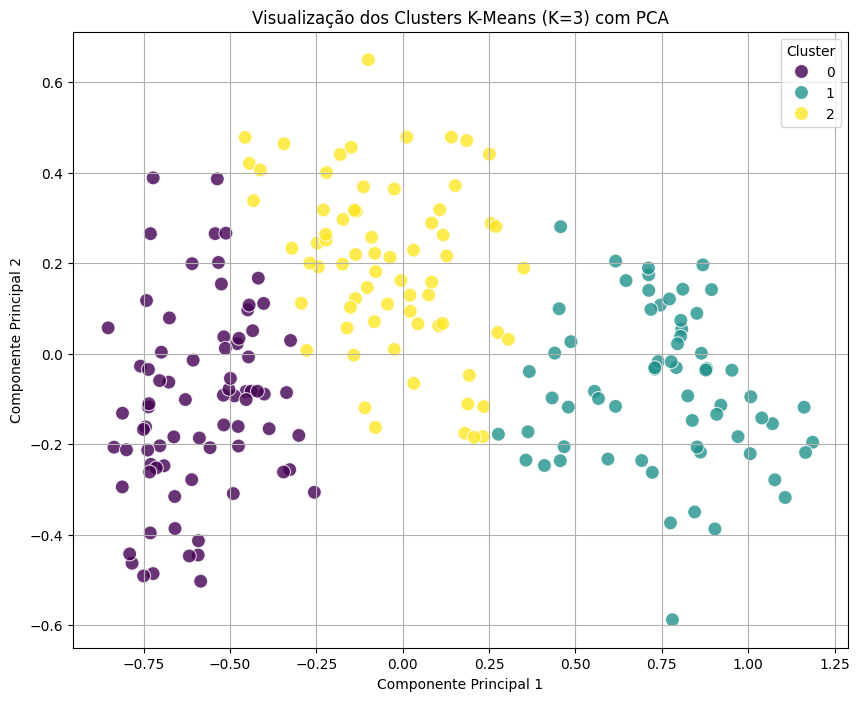

In [ ]:
# ========== EXTRA: VISUALIZAÇÃO DOS CLUSTERS ==========
plot_clusters(df_normalized, kmeans)

Em seguida, após essa primeira aplicação do algoritmo, os resultados obtidos devem ser validados utilizando 2 métricas principais:

*   **Adjusted Rand Index (ARI)**: intervalo [-1 a 1]
*   **Adjusted Mutual Information (AMI)**: intervalo [0 a 1]


Ambos utilizados para avaliar a qualidade do agrupamento.

In [ ]:
# ========== VALIDAÇÃO DOS RESULTADOS ==========
labels_true = df[7]
labels_pred = kmeans.labels_

ari_score = metrics.adjusted_rand_score(labels_true, labels_pred)
print(f'Adjusted Rand Index (ARI): {ari_score}')

ami_score = metrics.adjusted_mutual_info_score(labels_true, labels_pred)
print(f'Adjusted Mutual Information (AMI): {ami_score}')

Adjusted Rand Index (ARI): 0.7048605249026285
Adjusted Mutual Information (AMI): 0.6714050764384119


Em segunda análise, o algoritmo `Kmeans` pode ser aplicado a valores de `k` que variam em um dado intervalo a fim de descobrir qual o melhor número de grupos para o conjunto de dados utilizando o **método do cotovelo**.

Para isso, temos a sequência de etapas a seguir:

In [ ]:
# ========== DEFINIÇÃO DO INTERVALO ==========
min = 2
max = 15
K = range(min, max + 1)

Assim, o algoritmo `Kmeans` é executado para cada valor do intervalo e os resultados de cada agrupamento são armazenados.
- Para cada valor de k, é coletada a soma do quadrado das distâncias das instâncias aos respectivos centros de cluster
- O mesmo acontece para o índice de silhueta, avaliando a qualidade da separação entre os clusters

In [ ]:
# ========== APLICAÇÃO DO KMEANS NO INTERVALO ==========
# - Erro quadrático para cada k ==========
# - Índice de silhueta para cada k ==========
sum_of_squared_distances = []
silhouettes = []

for k in K:
  km = KMeans(n_clusters=k)
  km.fit(df_normalized)

  print(f'Para k = {k}:')

  # Erro quadrático (Soma das distâncias ao centro)
  sum_of_squared_distances.append(km.inertia_)
  print(f'Soma do quadrado das distâncias: {sum_of_squared_distances[k-2]}')

  # Índice de silhueta
  silhouettes.append(metrics.silhouette_score(df_normalized, km.labels_))
  print(f'Índice de silhueta: {silhouettes[k-2]}\n')


Para k = 2:
Soma do quadrado das distâncias: 34.81617194763056
Índice de silhueta: 0.5065995634296406

Para k = 3:
Soma do quadrado das distâncias: 22.02645122660663
Índice de silhueta: 0.42212676242010655

Para k = 4:
Soma do quadrado das distâncias: 18.73272299026969
Índice de silhueta: 0.34903472906371136

Para k = 5:
Soma do quadrado das distâncias: 16.328101670604873
Índice de silhueta: 0.3059483690958323

Para k = 6:
Soma do quadrado das distâncias: 14.649731574119947
Índice de silhueta: 0.28884793375148216

Para k = 7:
Soma do quadrado das distâncias: 14.001646606098618
Índice de silhueta: 0.2588505825697771

Para k = 8:
Soma do quadrado das distâncias: 12.956094325833279
Índice de silhueta: 0.26896326364863693

Para k = 9:
Soma do quadrado das distâncias: 11.422302821997743
Índice de silhueta: 0.25571887055870474

Para k = 10:
Soma do quadrado das distâncias: 10.893683210965316
Índice de silhueta: 0.24177882187245336

Para k = 11:
Soma do quadrado das distâncias: 9.980405315102

Em seguida, há a plotagem do **Gráfico do Método do Cotovelo** (Erro Quadrático), em que é gerado um gráfico relacionamento o número de clusters com o erro quadrático -> serve para identificar o ponto onde a melhoria do agrupamento deixa de ser significativa.
- O melhor `k` é onde a redução do erro passa a ser pequena

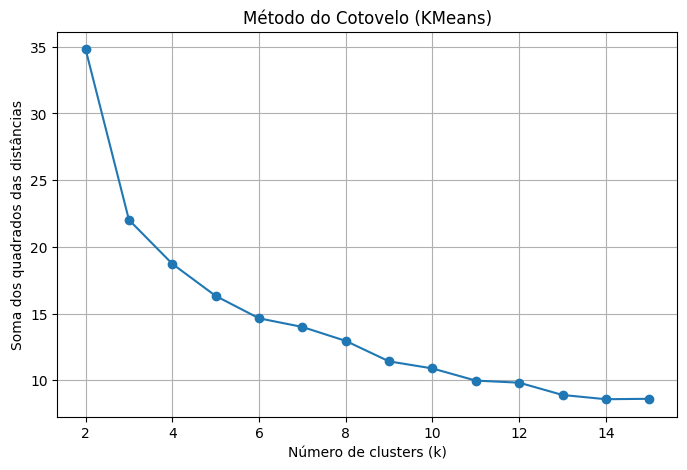

In [ ]:
# ========== GRÁFICO DOS ÍNDICES DE ERRO QUADRÁTICO ==========
plt.figure(figsize=(8,5))
plt.plot(K, sum_of_squared_distances, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo (KMeans)')
plt.grid(True)
plt.show()

Além disso, é plotado um gráfico do **Índice de Silhueta** em função do número de cluster para determinar o valor de k que maximiza a qualidade do agrupamento.
- O melhor `k` é o que maximiza o índice de silhueta

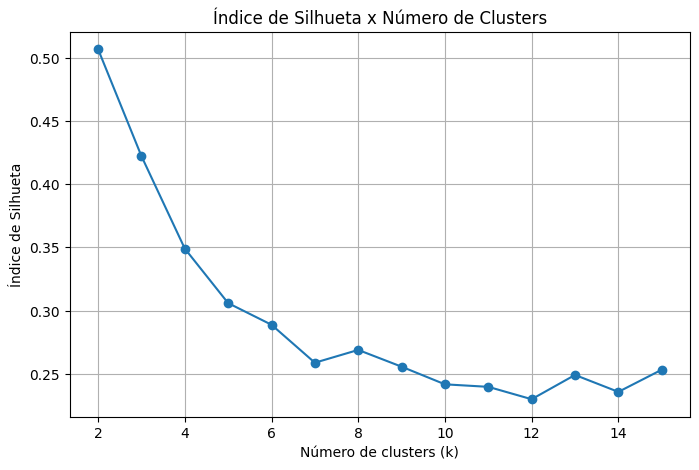

In [ ]:
# ========== GRÁFICO DOS ÍNDICES DE SILHUETA ==========
plt.figure(figsize=(8,5))
plt.plot(K, silhouettes, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Índice de Silhueta')
plt.title('Índice de Silhueta x Número de Clusters')
plt.grid(True)
plt.show()

Por fim, é aplicado o **algoritmo DBSCAN** no mesmo conjunto de dados e é calculado o número de clusters encontrados pelo algoritmo e o número de dados ruidosos.

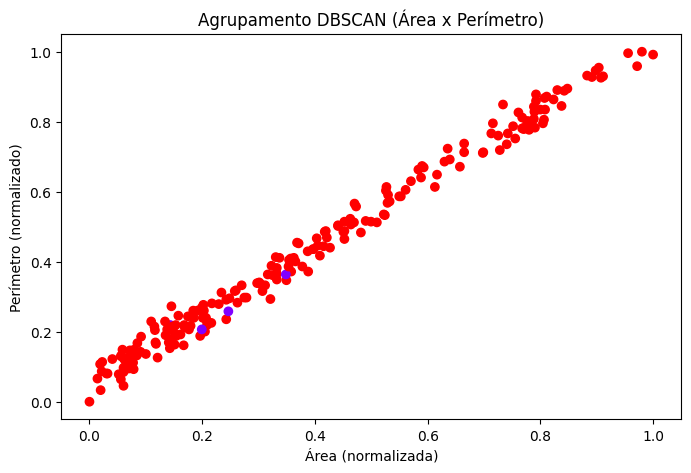

In [ ]:
# ========== APLICAÇÃO ALGORITMO DBSCAN ==========
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(df_normalized)

labels_db = dbscan.labels_

# Convertendo DataFrame para array NumPy para plotagem
X = df_normalized.values

plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], c=labels_db, cmap='rainbow')
plt.xlabel('Área (normalizada)')
plt.ylabel('Perímetro (normalizado)')
plt.title('Agrupamento DBSCAN (Área x Perímetro)')
plt.show()

In [ ]:
# ========== ANÁLISE ALGORITMO DBSCAN ==========
# - Número de clusters
# - Número de dados ruidosos

# Número de clusters (ignorando ruído)
n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)

# Número de dados ruidosos
n_noise = list(labels_db).count(-1)

print(f'Número de clusters encontrados pelo DBSCAN: {n_clusters_db}')
print(f'Número de pontos ruidosos: {n_noise}')

Número de clusters encontrados pelo DBSCAN: 1
Número de pontos ruidosos: 4
